<a href="https://colab.research.google.com/github/6yuvaldavid/Jury-Theorem/blob/main/Ex2_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Names and IDs
 1. 
 2. 

# I. Condorcet's Jury Theorem (1785)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

In [ ]:
#something with
import numpy as np

s = np.random.binomial(10, 0.6, 1000)
bool_array = np.array(s > 5)

count = np.count_nonzero(bool_array)

print(count/1000)

0.615


# II. AdaBoost
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-10,loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`.
 2. Explain you results in text and support it with figures.

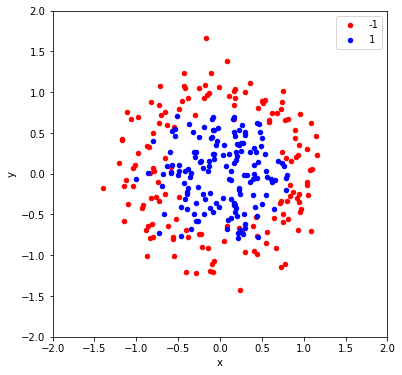

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

In [ ]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

#### Answer


0.5223880597014925
number of estimators is 1
number of estimators is 3
number of estimators is 10
number of estimators is 50
number of estimators is 100
number of estimators is 1000
number of estimators is 10000


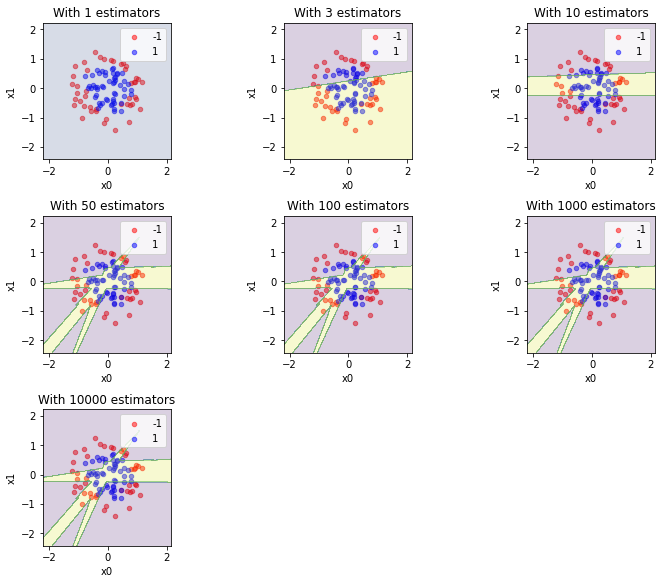

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
number_of_estimators = [1,3,10,50,100,1000,10000]
scores_for_n_train = []
scores_for_n_test = []

figsize = (10, 8)
axs = plt.figure(figsize=figsize, constrained_layout=True).subplots(3, 3)
axs = trim_axs(axs, len(number_of_estimators))


clf = AdaBoostClassifier(svm.LinearSVC(tol=1e-10,loss='hinge',C=1000, max_iter=50000),n_estimators=1, random_state=42, algorithm='SAMME')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print(clf.score(X_train,y_train))



for ax, case in zip(axs, number_of_estimators):
  print(f'number of estimators is {case}')
  clf = AdaBoostClassifier(svm.LinearSVC(tol=1e-10,loss='hinge',C=1000, max_iter=50000),n_estimators=case, random_state=42, algorithm='SAMME')
  clf.fit(X_train,y_train)
  
  ax.set_title(f'With {case} estimators')
  plot_data(X_test,y_test, clf.predict, ax)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  scores_for_n_train.append(accuracy)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  scores_for_n_test.append(accuracy)

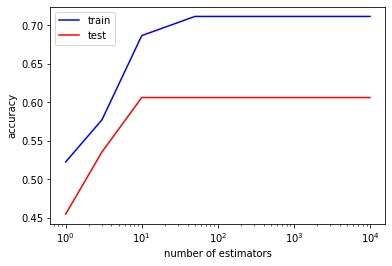

In [ ]:
fig, ax = plt.subplots()


ax.plot(number_of_estimators, scores_for_n_train, color='b', label='train')
ax.plot(number_of_estimators, scores_for_n_test, color='r', label='test')
ax.legend()
ax.set_xscale("log")
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.show()

In [ ]:
print(len(clf))
for i in clf.estimator_errors_[:26]:
  print(i)

26
0.4776119402985075
0.4172619047619048
0.47863186838006117
0.40168249230684255
0.46940201360829603
0.4566828228260382
0.49140711718425123
0.41125126475538637
0.453066236449186
0.4272308841195406
0.4822602403554886
0.4179155483878411
0.411698218338434
0.4710137598745451
0.4245158953429188
0.44352044959047787
0.47995396600954854
0.4519668164574702
0.46797395212557924
0.4858717464973267
0.46473288366116916
0.46520801594322136
0.4867492340595182
0.4840285203227693
0.45583549855439076
0.49258490748373096


# Your answers here

1. How does the overall train set accuracy change with  n ? 
as we can see from the previous figure the more estimators, the better our test score is, until we reach the 10 estimators, after that we stay on the same test accuracy

2. Does your model start to overfit at some point? How can you test and detect such a point?
I think it does, it depends on what you define as overfit, i think it over fits because the margin between test and train accuracy gets larger after the 10 estimators point, meaning in some point between 10 and 100 is your optimal spot.
However, if you define an overfit as when your test accuracy starts to decrease while the train accuracy keeps increasing then we do not have an overfit.
I would test it the same as i did in the last fig, compare the graph of the model accuracy with train data vs test data.

3. For this specific task, what is the optimal number of estimators? Hint: use estimator_errors_ attribute.
It seems like the answer is 26, i will explain two methods to reach that conclustion the first one is to check the len of the clf(which will be the actual number of estimators using) as well using the estimator_errors_ attribute of the adaboost to see the errors of each of the estimators, and when we look at that we can see that only 26 estimators has been trained. meaning that adaboost stopped early meaning the SAMME algorithm stopped early with only 26 estimators - probably the new ones wouldnt fit any better, couldnt find in sklearn documentation the part about early stopping except the perfect fit which is clearly not the case